In [1]:
# Analyst: Raghav Manocha
# initial coding done in excel
# I received 50 responses to my survey
# After data cleaning 44 responses were left
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('coded_data.xlsx')

In [3]:
data.head()

,Timestamp,Q1ATT,Q2NAME,Q3ONLINE,Q4AGE,Q4AGE_coded,Q5COUNTRY,Q6PRO,Q6PRO_coded,Q7BOOT,...,Q10SKIP,Q11SKIP2,Q12NETW,Q13NETW2,Q14INT,Q15SAT,Q16ENG,Q17ENG2,Q18COURSE,Q19MOT
0,2022/05/30 4:06:57 pm EET,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022/05/30 5:20:47 pm EET,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022/05/30 5:24:55 pm EET,1,1.0,1.0,33.0,3.0,3.0,Freelancer,2.0,1.0,...,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
3,2022/05/30 5:53:16 pm EET,1,1.0,1.0,24.0,1.0,2.0,Student,2.0,1.0,...,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0
4,2022/05/30 6:02:10 pm EET,1,1.0,2.0,27.0,2.0,1.0,Data analyst,1.0,1.0,...,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0


In [4]:
data.shape

(50, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    50 non-null     object 
 1   Q1ATT        50 non-null     int64  
 2   Q2NAME       44 non-null     float64
 3   Q3ONLINE     46 non-null     float64
 4   Q4AGE        46 non-null     float64
 5   Q4AGE_coded  46 non-null     float64
 6   Q5COUNTRY    45 non-null     float64
 7   Q6PRO        46 non-null     object 
 8   Q6PRO_coded  46 non-null     float64
 9   Q7BOOT       46 non-null     float64
 10  Q8GEN        46 non-null     float64
 11  Q9EDU        46 non-null     float64
 12  Q10SKIP      46 non-null     float64
 13  Q11SKIP2     46 non-null     float64
 14  Q12NETW      46 non-null     float64
 15  Q13NETW2     46 non-null     float64
 16  Q14INT       46 non-null     float64
 17  Q15SAT       46 non-null     float64
 18  Q16ENG       46 non-null     float64
 19  Q17ENG2   

In [6]:
data.isnull().sum()

Timestamp      0
Q1ATT          0
Q2NAME         6
Q3ONLINE       4
Q4AGE          4
Q4AGE_coded    4
Q5COUNTRY      5
Q6PRO          4
Q6PRO_coded    4
Q7BOOT         4
Q8GEN          4
Q9EDU          4
Q10SKIP        4
Q11SKIP2       4
Q12NETW        4
Q13NETW2       4
Q14INT         4
Q15SAT         4
Q16ENG         4
Q17ENG2        4
Q18COURSE      4
Q19MOT         4
dtype: int64

In [7]:
data_without_null = data.dropna()

In [8]:
data_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 2 to 49
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    44 non-null     object 
 1   Q1ATT        44 non-null     int64  
 2   Q2NAME       44 non-null     float64
 3   Q3ONLINE     44 non-null     float64
 4   Q4AGE        44 non-null     float64
 5   Q4AGE_coded  44 non-null     float64
 6   Q5COUNTRY    44 non-null     float64
 7   Q6PRO        44 non-null     object 
 8   Q6PRO_coded  44 non-null     float64
 9   Q7BOOT       44 non-null     float64
 10  Q8GEN        44 non-null     float64
 11  Q9EDU        44 non-null     float64
 12  Q10SKIP      44 non-null     float64
 13  Q11SKIP2     44 non-null     float64
 14  Q12NETW      44 non-null     float64
 15  Q13NETW2     44 non-null     float64
 16  Q14INT       44 non-null     float64
 17  Q15SAT       44 non-null     float64
 18  Q16ENG       44 non-null     float64
 19  Q17ENG2   

In [13]:
#Dictionaries for remaping values
dict_att = {1: 'Yes', 2: 'No'}
dict_name = {1: 'Ironhack', 2: 'Other'}
dict_online = {1: 'Online', 2: 'Offline'}
dict_age_coded = {1: '20-25', 2: '25-30', 3: '30-35', 4: '35-40', 5: '40-45', 6: '45-50'}
dict_country = {1:'Portugal', 2:'Spain', 3:'France', 4:'Netherlands', 5:'Germany', 6:'Italy', 7:'UK', 8:'Ireland', 9:'USA', 10:'Mexico', 11:'Brazil', 12:'India', 13:'Indonesia'}
dict_pro_coded = {1:'Tech and Data related', 2:'Other'}
dict_boot= {1:'Data Analytics', 2: 'Cyber Security', 3: 'Web development', 4: 'UX/UI Design', 5: 'Other'}
dict_gen= {1:'Female', 2:'Male', 3:'Non Binary', 4:'Prefer not to say'}
dict_edu= {1:'High School', 2:"Bachelor's Degree", 3:"Master's Degree", 4:'MPhil', 5:'PhD'}

In [14]:
data2 = data_without_null.replace({"Q1ATT":dict_att, "Q2NAME":dict_name,"Q3ONLINE":dict_online, "Q4AGE_coded":dict_age_coded, "Q5COUNTRY": dict_country,"Q6PRO_coded":dict_pro_coded, "Q7BOOT":dict_boot, "Q8GEN":dict_gen, "Q9EDU":dict_edu})

In [15]:
data2.head()

,Timestamp,Q1ATT,Q2NAME,Q3ONLINE,Q4AGE,Q4AGE_coded,Q5COUNTRY,Q6PRO,Q6PRO_coded,Q7BOOT,...,Q10SKIP,Q11SKIP2,Q12NETW,Q13NETW2,Q14INT,Q15SAT,Q16ENG,Q17ENG2,Q18COURSE,Q19MOT
2,2022/05/30 5:24:55 pm EET,Yes,Ironhack,Online,33.0,30-35,France,Freelancer,Other,Data Analytics,...,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
3,2022/05/30 5:53:16 pm EET,Yes,Ironhack,Online,24.0,20-25,Spain,Student,Other,Data Analytics,...,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0
4,2022/05/30 6:02:10 pm EET,Yes,Ironhack,Offline,27.0,25-30,Portugal,Data analyst,Tech and Data related,Data Analytics,...,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0
5,2022/05/30 6:27:06 pm EET,Yes,Ironhack,Online,34.0,30-35,Spain,Student,Other,Data Analytics,...,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2.0,3.0,3.0
6,2022/05/30 6:31:26 pm EET,Yes,Ironhack,Online,33.0,30-35,Ireland,IT Sales,Other,Data Analytics,...,5.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0


In [16]:
data2['Skip_Final']= (data2['Q10SKIP'] + data2['Q11SKIP2'])/2

In [17]:
data2.head()

,Timestamp,Q1ATT,Q2NAME,Q3ONLINE,Q4AGE,Q4AGE_coded,Q5COUNTRY,Q6PRO,Q6PRO_coded,Q7BOOT,...,Q11SKIP2,Q12NETW,Q13NETW2,Q14INT,Q15SAT,Q16ENG,Q17ENG2,Q18COURSE,Q19MOT,Skip_Final
2,2022/05/30 5:24:55 pm EET,Yes,Ironhack,Online,33.0,30-35,France,Freelancer,Other,Data Analytics,...,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
3,2022/05/30 5:53:16 pm EET,Yes,Ironhack,Online,24.0,20-25,Spain,Student,Other,Data Analytics,...,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0
4,2022/05/30 6:02:10 pm EET,Yes,Ironhack,Offline,27.0,25-30,Portugal,Data analyst,Tech and Data related,Data Analytics,...,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.5
5,2022/05/30 6:27:06 pm EET,Yes,Ironhack,Online,34.0,30-35,Spain,Student,Other,Data Analytics,...,4.0,4.0,4.0,5.0,4.0,4.0,2.0,3.0,3.0,4.0
6,2022/05/30 6:31:26 pm EET,Yes,Ironhack,Online,33.0,30-35,Ireland,IT Sales,Other,Data Analytics,...,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0


In [18]:
data2['Netw_Final']= (data2['Q12NETW'] + data2['Q13NETW2'])/2
data2['Eng_Final']= (data2['Q16ENG'] + data2['Q17ENG2'])/2

In [19]:
data2.head()

,Timestamp,Q1ATT,Q2NAME,Q3ONLINE,Q4AGE,Q4AGE_coded,Q5COUNTRY,Q6PRO,Q6PRO_coded,Q7BOOT,...,Q13NETW2,Q14INT,Q15SAT,Q16ENG,Q17ENG2,Q18COURSE,Q19MOT,Skip_Final,Netw_Final,Eng_Final
2,2022/05/30 5:24:55 pm EET,Yes,Ironhack,Online,33.0,30-35,France,Freelancer,Other,Data Analytics,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,2022/05/30 5:53:16 pm EET,Yes,Ironhack,Online,24.0,20-25,Spain,Student,Other,Data Analytics,...,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.5,5.0
4,2022/05/30 6:02:10 pm EET,Yes,Ironhack,Offline,27.0,25-30,Portugal,Data analyst,Tech and Data related,Data Analytics,...,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.5,5.0,4.5
5,2022/05/30 6:27:06 pm EET,Yes,Ironhack,Online,34.0,30-35,Spain,Student,Other,Data Analytics,...,4.0,5.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0
6,2022/05/30 6:31:26 pm EET,Yes,Ironhack,Online,33.0,30-35,Ireland,IT Sales,Other,Data Analytics,...,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,4.5


In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 2 to 49
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    44 non-null     object 
 1   Q1ATT        44 non-null     object 
 2   Q2NAME       44 non-null     object 
 3   Q3ONLINE     44 non-null     object 
 4   Q4AGE        44 non-null     float64
 5   Q4AGE_coded  44 non-null     object 
 6   Q5COUNTRY    44 non-null     object 
 7   Q6PRO        44 non-null     object 
 8   Q6PRO_coded  44 non-null     object 
 9   Q7BOOT       44 non-null     object 
 10  Q8GEN        44 non-null     object 
 11  Q9EDU        44 non-null     object 
 12  Q10SKIP      44 non-null     float64
 13  Q11SKIP2     44 non-null     float64
 14  Q12NETW      44 non-null     float64
 15  Q13NETW2     44 non-null     float64
 16  Q14INT       44 non-null     float64
 17  Q15SAT       44 non-null     float64
 18  Q16ENG       44 non-null     float64
 19  Q17ENG2   

In [22]:
data2.describe()

,Q4AGE,Q10SKIP,Q11SKIP2,Q12NETW,Q13NETW2,Q14INT,Q15SAT,Q16ENG,Q17ENG2,Q18COURSE,Q19MOT,Skip_Final,Netw_Final,Eng_Final
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,30.931818,3.818182,3.522727,4.090909,4.318182,4.704545,4.477273,3.863636,4.295455,4.159091,4.090909,3.670455,4.204545,4.079545
std,5.461909,1.186606,1.151109,0.935556,0.883248,0.509425,0.698458,0.851562,0.764915,0.745317,0.935556,0.933505,0.749559,0.681510
min,20.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.500000
25%,27.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
50%,32.000000,4.000000,4.000000,4.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.750000,4.500000,4.000000
75%,34.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.500000,5.000000,4.500000
max,48.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0.5, 1.0, 'Participation as per mode')

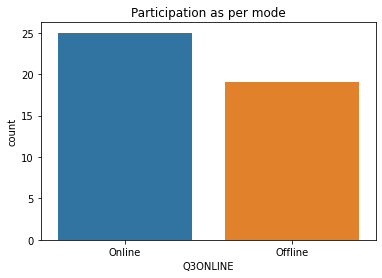

In [34]:
sns.countplot(x=data2['Q3ONLINE'], data=data2).set_title('Participation as per mode')

Text(0.5, 1.0, 'Participation as per age groups')

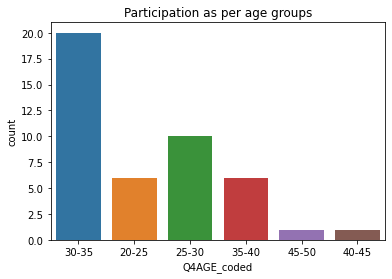

In [32]:
sns.countplot(x=data2['Q4AGE_coded'], data=data2).set_title('Participation as per age groups')

Text(0.5, 1.0, 'Participation as per profession')

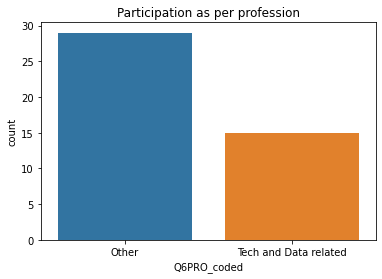

In [33]:
sns.countplot(x=data2['Q6PRO_coded'], data=data2).set_title('Participation as per profession')

Text(0.5, 1.0, 'Participation as per bootcamp')

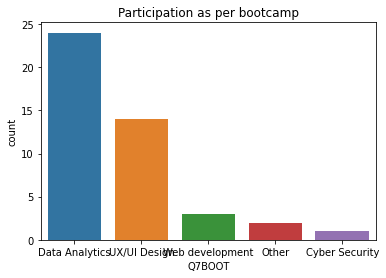

In [35]:
sns.countplot(x=data2['Q7BOOT'], data=data2).set_title('Participation as per bootcamp')

Text(0.5, 1.0, 'Participation as per gender')

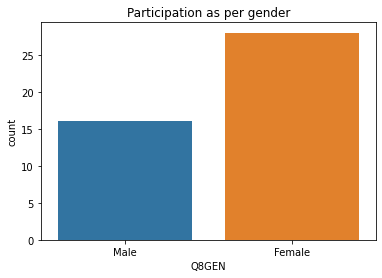

In [36]:
sns.countplot(x=data2['Q8GEN'], data=data2).set_title('Participation as per gender')

Text(0.5, 1.0, 'Participation as per gender')

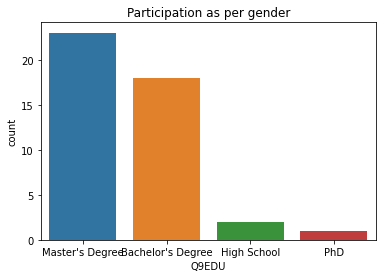

In [37]:
sns.countplot(x=data2['Q9EDU'], data=data2).set_title('Participation as per gender')

In [84]:
data3=data2

In [86]:
data3.head()

,Timestamp,Q1ATT,Q2NAME,Q3ONLINE,Q4AGE,Q4AGE_coded,Q5COUNTRY,Q6PRO,Q6PRO_coded,Q7BOOT,...,Q13NETW2,Q14INT,Q15SAT,Q16ENG,Q17ENG2,Q18COURSE,Q19MOT,Skip_Final,Netw_Final,Eng_Final
2,2022/05/30 5:24:55 pm EET,Yes,Ironhack,Online,33.0,30-35,France,Freelancer,Other,Data Analytics,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,2022/05/30 5:53:16 pm EET,Yes,Ironhack,Online,24.0,20-25,Spain,Student,Other,Data Analytics,...,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.5,5.0
4,2022/05/30 6:02:10 pm EET,Yes,Ironhack,Offline,27.0,25-30,Portugal,Data analyst,Tech and Data related,Data Analytics,...,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.5,5.0,4.5
5,2022/05/30 6:27:06 pm EET,Yes,Ironhack,Online,34.0,30-35,Spain,Student,Other,Data Analytics,...,4.0,5.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0
6,2022/05/30 6:31:26 pm EET,Yes,Ironhack,Online,33.0,30-35,Ireland,IT Sales,Other,Data Analytics,...,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,4.5


In [93]:
data3.groupby('Q3ONLINE').mean()

,Q4AGE,Q10SKIP,Q11SKIP2,Q12NETW,Q13NETW2,Q14INT,Q15SAT,Q16ENG,Q17ENG2,Q18COURSE,Q19MOT,Skip_Final,Netw_Final,Eng_Final
Q3ONLINE,,,,,,,,,,,,,,
Offline,30.00,3.578947,3.578947,4.315789,4.736842,4.842105,4.631579,3.789474,4.473684,4.315789,4.421053,3.578947,4.526316,4.131579
Online,31.64,4.000000,3.480000,3.920000,4.000000,4.600000,4.360000,3.920000,4.160000,4.040000,3.840000,3.740000,3.960000,4.040000


In [23]:
# Hypothesis testing (H1)
# H0: Students attending classes online and offline have similar attendance
# H1: Students attending classes online would have higher attendance than students attending classes offline
# H0: can't be rejected
# It seems online students have better attendance than online students but this difference is not statistically significant
st.ttest_ind(data2['Skip_Final'][data2['Q3ONLINE'] == 'Online'], data2['Skip_Final'][data2['Q3ONLINE'] == 'Offline'], equal_var=False)

Ttest_indResult(statistic=0.5794942989227923, pvalue=0.5653631498812779)

In [26]:
st.ttest_ind(data2['Skip_Final'][data2['Q3ONLINE'] == 'Online'], data2['Skip_Final'][data2['Q3ONLINE'] == 'Offline'], equal_var=False, alternative = 'greater')

Ttest_indResult(statistic=0.5794942989227923, pvalue=0.28268157494063895)

Text(0.5, 1.0, 'Box plot for attendance/unlikeliness to skip classes with respect to mode of classes')

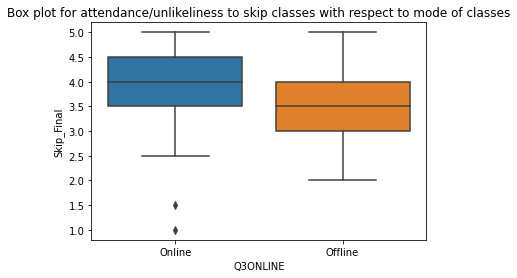

In [28]:
sns.boxplot(x=data2['Q3ONLINE'], y = data2['Skip_Final'], data= data2).set_title('Box plot for attendance/unlikeliness to skip classes with respect to mode of classes')

Text(0.5, 1.0, 'Bar plot for attendance/unlikeliness to skip classes with respect to mode of classes')

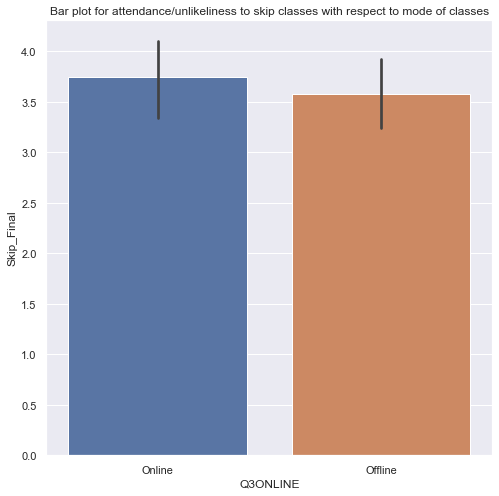

In [43]:
sns.barplot(y=data2['Skip_Final'], x=data2['Q3ONLINE'], data=data2).set_title('Bar plot for attendance/unlikeliness to skip classes with respect to mode of classes')

In [38]:
# Hypothesis testing (H2)
# H0: Students attending classes online and offline would find it equally easy or difficult to network
# H2: Students attending classes online would find it less easy to network than students attending classes offline

# H0 is rejected
st.ttest_ind(data2['Netw_Final'][data2['Q3ONLINE'] == 'Online'], data2['Netw_Final'][data2['Q3ONLINE'] == 'Offline'], equal_var=False)

Ttest_indResult(statistic=-2.75233826392921, pvalue=0.008700252161683408)

In [45]:
st.ttest_ind(data2['Netw_Final'][data2['Q3ONLINE'] == 'Online'], data2['Netw_Final'][data2['Q3ONLINE'] == 'Offline'], equal_var=False, alternative= 'less')

Ttest_indResult(statistic=-2.75233826392921, pvalue=0.004350126080841704)

Text(0.5, 1.0, 'Box plot for how easy it is to network with respect to mode of classes')

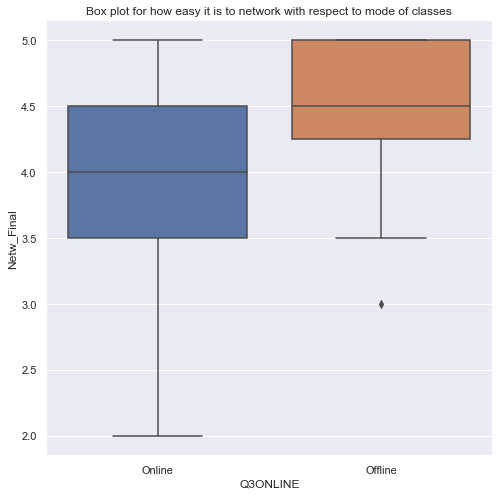

In [40]:
sns.set(rc={"figure.figsize":(8, 8)})
sns.boxplot(x=data2['Q3ONLINE'], y = data2['Netw_Final'], data= data2).set_title('Box plot for how easy it is to network with respect to mode of classes')

Text(0.5, 1.0, 'Bar plot for how easy it is to network with respect to mode of classes')

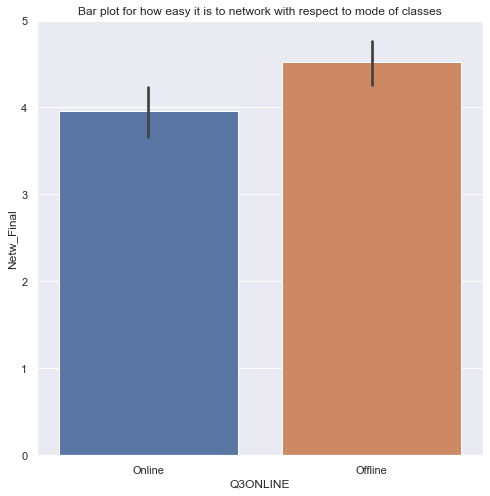

In [44]:
sns.barplot(y=data2['Netw_Final'], x=data2['Q3ONLINE'], data=data2).set_title('Bar plot for how easy it is to network with respect to mode of classes')

In [46]:
# Hypothesis testing (H3)
# H0: Students attending classes online and offline would have similar levels of overall satisfaction
# H3: Students attending classes online would have different level of overall satisfaction than students attending classes offline

#HO: can't be rejected
st.ttest_ind(data2['Q15SAT'][data2['Q3ONLINE'] == 'Online'], data2['Q15SAT'][data2['Q3ONLINE'] == 'Offline'], equal_var=False)

Ttest_indResult(statistic=-1.3717906912548548, pvalue=0.17770056906998385)

In [47]:
st.ttest_ind(data2['Q15SAT'][data2['Q3ONLINE'] == 'Online'], data2['Q15SAT'][data2['Q3ONLINE'] == 'Offline'], equal_var=False, alternative='less')

Ttest_indResult(statistic=-1.3717906912548548, pvalue=0.08885028453499193)

Text(0.5, 1.0, 'Box plot for overall satisfaction with classes with respect to mode of classes')

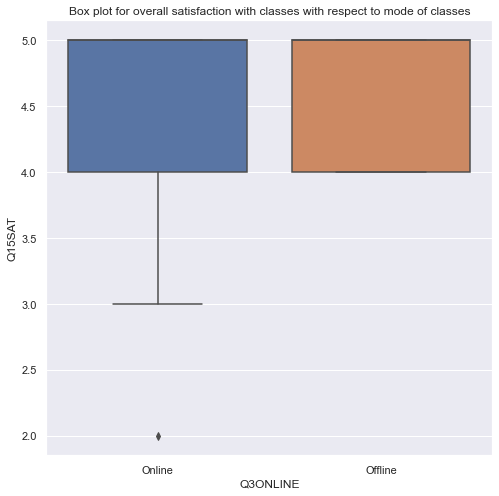

In [48]:
sns.boxplot(x=data2['Q3ONLINE'], y = data2['Q15SAT'], data= data2).set_title('Box plot for overall satisfaction with classes with respect to mode of classes')

Text(0.5, 1.0, 'Bar plot for overall satisfaction with classes with respect to mode of classes')

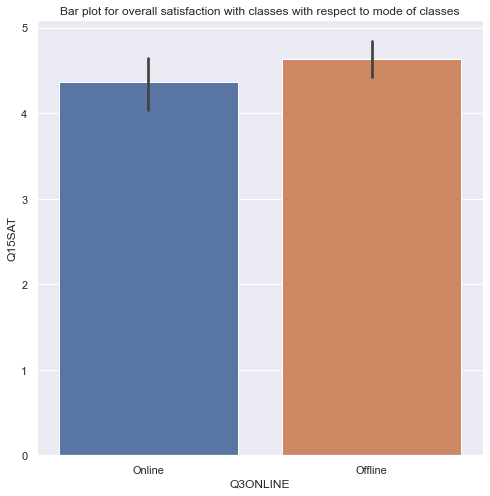

In [49]:
sns.barplot(y=data2['Q15SAT'], x=data2['Q3ONLINE'], data=data2).set_title('Bar plot for overall satisfaction with classes with respect to mode of classes')

In [50]:
# Hypothesis testing (H4)
# H0: Students attending classes online and offline would experience a similar ease of interaction with the professor
# H4: Students attending classes online would find it more difficult to interact with professor than students attending classes offline

#HO: can't be rejected
st.ttest_ind(data2['Q14INT'][data2['Q3ONLINE'] == 'Online'], data2['Q14INT'][data2['Q3ONLINE'] == 'Offline'], equal_var=False)

Ttest_indResult(statistic=-1.5883067212684727, pvalue=0.12032446001247038)

In [51]:
st.ttest_ind(data2['Q14INT'][data2['Q3ONLINE'] == 'Online'], data2['Q14INT'][data2['Q3ONLINE'] == 'Offline'], equal_var=False, alternative='less')

Ttest_indResult(statistic=-1.5883067212684727, pvalue=0.06016223000623519)

Text(0.5, 1.0, 'Box plot for ease of interaction with professor during different mode of classes')

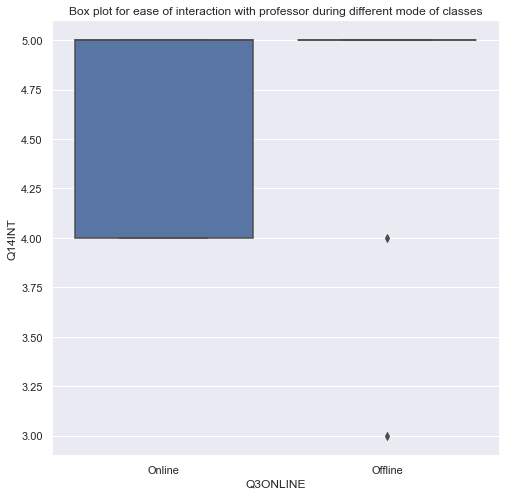

In [52]:
sns.boxplot(x=data2['Q3ONLINE'], y = data2['Q14INT'], data= data2).set_title('Box plot for ease of interaction with professor during different mode of classes')

Text(0.5, 1.0, 'Bar plot for ease of interaction with professor during different mode of classes')

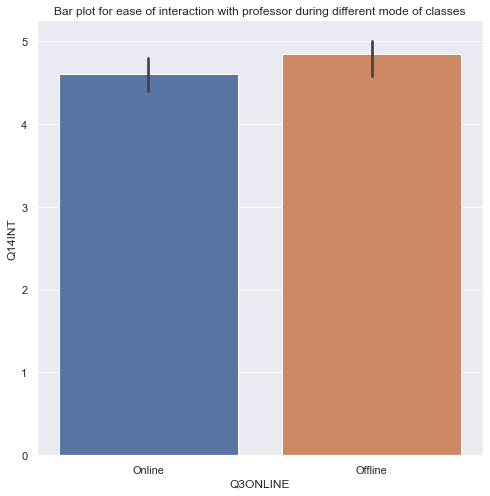

In [53]:
sns.barplot(y=data2['Q14INT'], x=data2['Q3ONLINE'], data=data2).set_title('Bar plot for ease of interaction with professor during different mode of classes')

In [54]:
# Hypothesis testing (H5)
# H0: Students attending classes online and offline would experience a similar a similar level of engagement
# H5: Students attending classes online would experience a different level of engagement in class than students attending classes offline

#HO: can't be rejected
st.ttest_ind(data2['Eng_Final'][data2['Q3ONLINE'] == 'Online'], data2['Eng_Final'][data2['Q3ONLINE'] == 'Offline'], equal_var=False)

Ttest_indResult(statistic=-0.45461242990061324, pvalue=0.6517291762038292)

Text(0.5, 1.0, 'Box plot for level of engagement in class with respect to mode of classes')

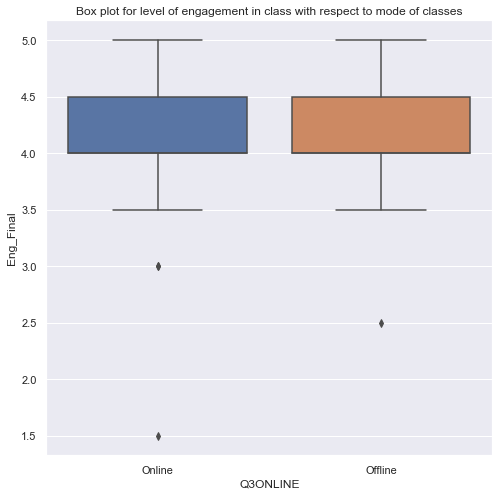

In [55]:
sns.boxplot(x=data2['Q3ONLINE'], y = data2['Eng_Final'], data= data2).set_title('Box plot for level of engagement in class with respect to mode of classes')

Text(0.5, 1.0, 'Bar plot for level of engagement in class with respect to mode of classes')

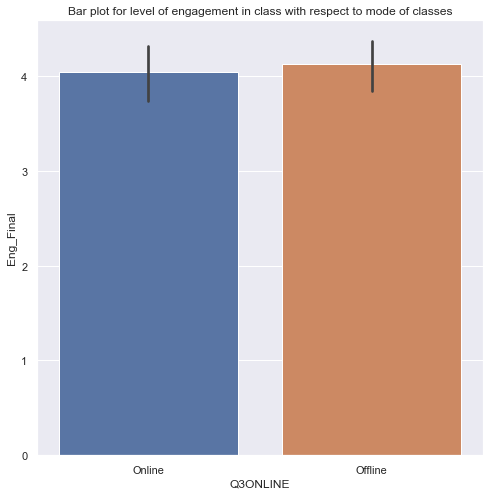

In [56]:
sns.barplot(y=data2['Eng_Final'], x=data2['Q3ONLINE'], data=data2).set_title('Bar plot for level of engagement in class with respect to mode of classes')

In [57]:
# Hypothesis testing (H12)
# H0: Students from tech and data related professions and students from non tech and data related professions would experience equal levels of overall satisfaction from the bootcamp classes
# H12: Students from tech and data related professions would experience greater overall satisfaction from classes than students from non tech and data related professions

#HO: can't be rejected
st.ttest_ind(data2['Q15SAT'][data2['Q6PRO_coded'] == 'Tech and Data related'], data2['Q15SAT'][data2['Q6PRO_coded'] == 'Other'], equal_var=False)

Ttest_indResult(statistic=-0.5116950561968147, pvalue=0.6130638478807678)

Text(0.5, 1.0, 'Box plot for level of overall satisfaction from classes with respect to profession of students')

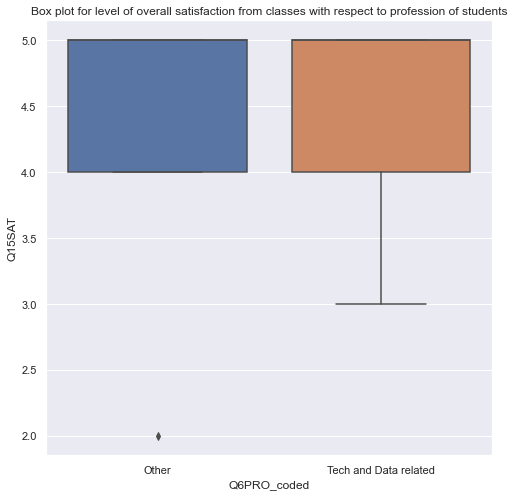

In [59]:
sns.boxplot(x=data2['Q6PRO_coded'], y = data2['Q15SAT'], data= data2).set_title('Box plot for level of overall satisfaction from classes with respect to profession of students')

Text(0.5, 1.0, 'Bar plot for level of overall satisfaction from classes with respect to profession of students')

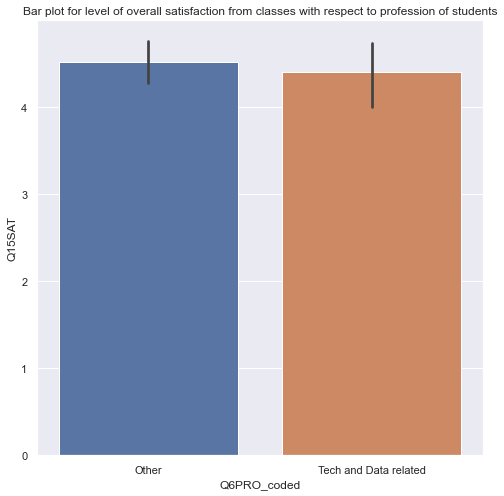

In [60]:
sns.barplot(y = data2['Q15SAT'], x=data2['Q6PRO_coded'], data= data2).set_title('Bar plot for level of overall satisfaction from classes with respect to profession of students')

In [61]:
#def coding(x):
#    if x < 3:
#        return 'Low'
#    elif x > 3:
#        return 'High'
#    else:
#        return "Don't Know"

In [62]:
#data2['Skip_Final_Coded'] = data2['Skip_Final'].apply(coding)

In [67]:
#data2.drop('Skip_Final_Coded', axis=1, inplace=True)

In [68]:
data2.head()

,Timestamp,Q1ATT,Q2NAME,Q3ONLINE,Q4AGE,Q4AGE_coded,Q5COUNTRY,Q6PRO,Q6PRO_coded,Q7BOOT,...,Q13NETW2,Q14INT,Q15SAT,Q16ENG,Q17ENG2,Q18COURSE,Q19MOT,Skip_Final,Netw_Final,Eng_Final
2,2022/05/30 5:24:55 pm EET,Yes,Ironhack,Online,33.0,30-35,France,Freelancer,Other,Data Analytics,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,2022/05/30 5:53:16 pm EET,Yes,Ironhack,Online,24.0,20-25,Spain,Student,Other,Data Analytics,...,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.5,5.0
4,2022/05/30 6:02:10 pm EET,Yes,Ironhack,Offline,27.0,25-30,Portugal,Data analyst,Tech and Data related,Data Analytics,...,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.5,5.0,4.5
5,2022/05/30 6:27:06 pm EET,Yes,Ironhack,Online,34.0,30-35,Spain,Student,Other,Data Analytics,...,4.0,5.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0
6,2022/05/30 6:31:26 pm EET,Yes,Ironhack,Online,33.0,30-35,Ireland,IT Sales,Other,Data Analytics,...,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,4.5


In [ ]:
# Hypothesis testing (H6)
# H0: Students with lower and higher attendance have equal overall satisfaction
# H6: Students with lower attendance would have lower overall satisfaction than students with higher attendance
#HO: can't be rejected
#st.ttest_ind(data2['Q15SAT'][data2['Skip_Final'] < 3], data2['Q15SAT'][data2['Skip_Final'] == 'Other'], equal_var=False)

In [66]:
data2['Skip_Final'].value_counts()

4.0    10
3.0     9
3.5     8
4.5     6
5.0     6
2.5     2
1.5     1
2.0     1
1.0     1
Name: Skip_Final, dtype: int64

In [70]:
data2['Netw_Final'].value_counts()

5.0    13
4.0    12
4.5    10
3.0     6
3.5     2
2.0     1
Name: Netw_Final, dtype: int64

In [71]:
data2['Eng_Final'].value_counts()

4.0    16
4.5    14
5.0     5
3.5     5
3.0     2
1.5     1
2.5     1
Name: Eng_Final, dtype: int64

In [72]:
data2['Q14INT'].value_counts()

5.0    32
4.0    11
3.0     1
Name: Q14INT, dtype: int64

In [74]:
data2['Q18COURSE'].value_counts()

4.0    25
5.0    14
3.0     3
2.0     2
Name: Q18COURSE, dtype: int64

In [75]:
data2['Q19MOT'].value_counts()

4.0    18
5.0    17
3.0     5
2.0     4
Name: Q19MOT, dtype: int64

<AxesSubplot:>

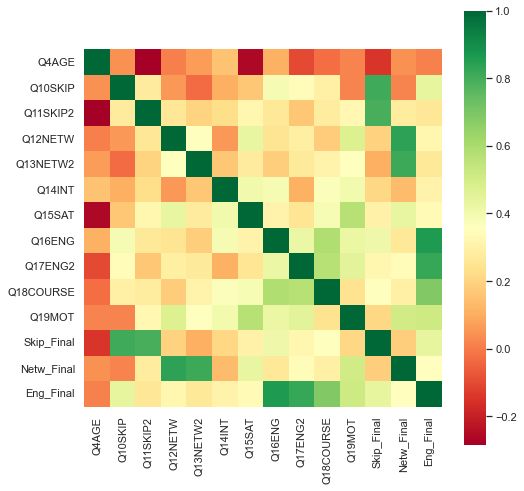

In [69]:
sns.heatmap(data2.corr(), square=True, cmap='RdYlGn')

In [ ]:
# For H6, H7, H8, H9, H10, H11
# There is low to medium statistically significant correlation in each case

In [77]:
corr1 = st.pearsonr(data2['Skip_Final'], data2['Q15SAT'])
print(corr1)

(0.3003377739479237, 0.047607193628401004)


In [78]:
corr2 = st.pearsonr(data2['Netw_Final'], data2['Q15SAT'])
print(corr2)

(0.4310824994348343, 0.0034851353564617155)


In [79]:
corr3 = st.pearsonr(data2['Q14INT'], data2['Q15SAT'])
print(corr3)

(0.4055281911221276, 0.006315019572554402)


In [80]:
corr4 = st.pearsonr(data2['Eng_Final'], data2['Q15SAT'])
print(corr4)

(0.3336652330697198, 0.026868076536523035)


In [81]:
corr5 = st.pearsonr(data2['Q19MOT'], data2['Q15SAT'])
print(corr5)

(0.5726671099542101, 4.863335171203376e-05)


In [82]:
corr6 = st.pearsonr(data2['Q18COURSE'], data2['Q15SAT'])
print(corr6)

(0.38683233312774246, 0.009488390650413953)


In [92]:
# Offline students are more motivated than online students
st.ttest_ind(data2['Q19MOT'][data2['Q3ONLINE'] == 'Online'], data2['Q19MOT'][data2['Q3ONLINE'] == 'Offline'], equal_var=False)

Ttest_indResult(statistic=-2.2792410615271286, pvalue=0.028165212376096163)

In [94]:
data4=data2

In [95]:
data4.groupby('Q6PRO_coded').mean()

,Q4AGE,Q10SKIP,Q11SKIP2,Q12NETW,Q13NETW2,Q14INT,Q15SAT,Q16ENG,Q17ENG2,Q18COURSE,Q19MOT,Skip_Final,Netw_Final,Eng_Final
Q6PRO_coded,,,,,,,,,,,,,,
Other,30.689655,3.827586,3.586207,4.344828,4.482759,4.689655,4.517241,3.896552,4.310345,4.103448,4.137931,3.706897,4.413793,4.103448
Tech and Data related,31.400000,3.800000,3.400000,3.600000,4.000000,4.733333,4.400000,3.800000,4.266667,4.266667,4.000000,3.600000,3.800000,4.033333


In [96]:
# saving the dataframe to an excel file
file_name = 'data_for_tableau.xlsx'

In [97]:
data2.to_excel(file_name)
print('Your data has been successfully exported into an Excel File')

Your data has been successfully exported into an Excel File
